## Context

Enakl is a bus sharing transportation solution that focuses on offering a reliable, comfortable and secure mobility service for commuters: Based on what we think the market of workers needs (mobility from home to work and vice versa), we create lines and open them for reservations (pre-booking). Our objective is to have at least 50% fill rate for our 20-seats buses and to ensure high customer satisfaction ratings.  


You have access to a google sheet that has all the bookings from this year.

* Google sheet link: https://docs.google.com/spreadsheets/d/1vokpxy5k88m0_rfTKDYZMTxWepQKlkDYG14netFb8zY
* Google sheet name: bookings_data

The data should be self-explanatory.
Not all columns are needed for this challenge.

Some important specifications:

- date_booking captures when the user books a ride (either directly via the app or indirectly when a support agent or a manager does that for them)
- date_ride captures the actual date of the ride
- A booking can be canceled (by the user directly or an agent/manager) as long as the day/time of the booked ride didn't happen.
- If a booking is not canceled and the user doesn't show up the day/time of the ride, the driver cancels the ride and the `booking_status` will be logged as 'Canceled by driver'
- Once a ride is done (user dropped off at destination point), we ask the user to rate the service and the driver via the app
- date_joined captures when the user installed the app and created an account



## Asks:


### Challenge 1: Business Curiosity & Data Insights

Conduct some exploratory data analysis (EDA) to understand the data further and uncover some insights.
Explain what you did and why.
Summaries the insights you found.  


### Challenge 2: Busline performance (You have to write the query using SQL)

As mentioned in the introduction, we care a lot about having a high enough fill-rate of our buses (at least 50%) to ensure that we are profitable.

We want to analyse how our current buslines are performing by doing the following:

For each line:
- We want to find out when it was launched
- We will call the week of the launch week_0 (week is from monday to sunday)
- Then for each week, we want to calculate the average fill rate during that week

The fill rate for a busline on a given day represents the percentage of occupied seats: If for busline X on 15/12/2023, we had 10 passengers, that means the fill rate for that day is 50% (all buses have 20 seats)

**IMPORTANT:** All of those metrics have to be calculated using sql in one query

The results should be displayed as:
- Pivot table with the buslines captured as row, the weeks as columns and the average weekly fill rates as metrics
- Choose another visualisation to communicate the resutls


### Challenge 3: Conclusions and perspectives

Summarise in 5 sentences what you've learned from the data and what you think we should explore and focus on next, and why.  


## What is expected from you:

- Copy this colab, add your first name to the title
- All your work should be contained in your notebook
- Once done, share your notebook with me ahmed@enakl.com (view access)

## What you will be evaluated on:

- Understanding of what the data captures
- Communicating your thoughts and results clearly
- Writing clear clean code
- Your business understanding
- Your analytical thinking
- Your python and sql skills

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pyodbc
bookings_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1vokpxy5k88m0_rfTKDYZMTxWepQKlkDYG14netFb8zY/export?format=csv")


In [2]:

!pip install --upgrade pandas seaborn matplotlib

bookings_data.info()

print(bookings_data.columns)

Defaulting to user installation because normal site-packages is not writeable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17722 entries, 0 to 17721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   booking_id           17722 non-null  int64  
 1   booked_from          17722 non-null  object 
 2   date_booking         17722 non-null  object 
 3   number_passengers    17722 non-null  int64  
 4   booking_status       17722 non-null  object 
 5   date_cancellation    1986 non-null   object 
 6   user_id              17722 non-null  int64  
 7   date_joined          17413 non-null  object 
 8   address_origin       17722 non-null  object 
 9   address_destination  17722 non-null  object 
 10  is_user_anonymized   17722 non-null  bool   
 11  date_ride            17722 non-null  object 
 12  busline_name         17561 non-null  object 
 13  driver_name          16686 non-null  object 
 14  rating_d


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\emtin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:

bookings_data.describe()


,booking_id,number_passengers,user_id,rating_driver,rating_service,initial_price
count,17722.000000,17722.000000,17722.000000,3899.000000,3911.000000,17722.000000
mean,16632.025561,1.003724,1818.313791,4.865350,4.754538,22.222040
std,7079.533966,0.060914,932.390039,0.568163,0.817700,6.292152
min,5176.000000,1.000000,116.000000,1.000000,1.000000,0.000000
25%,10399.250000,1.000000,1090.000000,5.000000,5.000000,18.000000
50%,16195.500000,1.000000,1587.000000,5.000000,5.000000,20.000000
75%,22627.750000,1.000000,2216.000000,5.000000,5.000000,25.000000
max,29473.000000,2.000000,5005.000000,5.000000,5.000000,60.000000


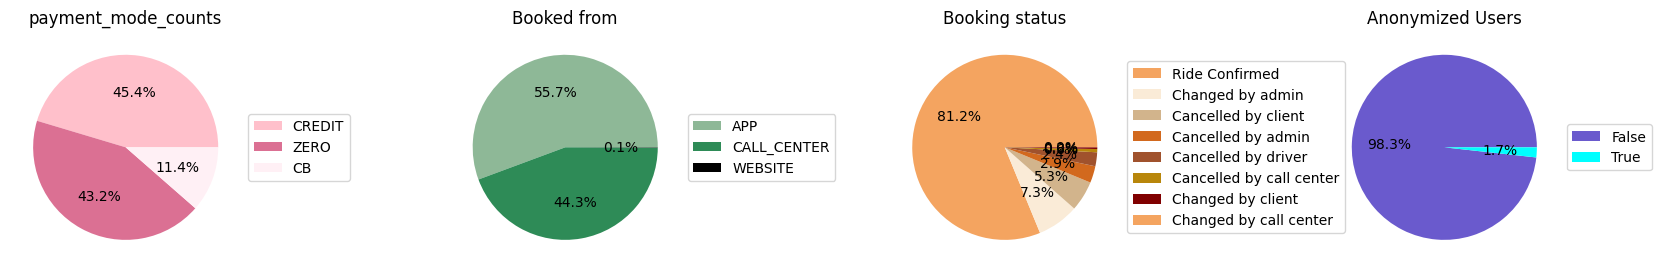

In [4]:

payment_mode_counts = bookings_data['payment_mode'].value_counts()
booked_from_counts = bookings_data['booked_from'].value_counts()
booking_status_counts = bookings_data['booking_status'].value_counts()
Anonymized_user_counts = bookings_data['is_user_anonymized'].value_counts()
fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].pie(payment_mode_counts, autopct='%1.1f%%', colors=['pink', 'palevioletred','lavenderblush'])
ax[0].set_title('payment_mode_counts')
ax[0].legend(labels=payment_mode_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].pie(booked_from_counts, autopct='%1.1f%%', colors=['#8EB897', 'seagreen','black'])
ax[1].set_title('Booked from')
ax[1].legend(labels=booked_from_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].pie(booking_status_counts, autopct='%1.1f%%', colors=['sandybrown', 'antiquewhite', 'tan','chocolate','sienna','darkgoldenrod','maroon'])
ax[2].set_title('Booking status')
ax[2].legend(labels=booking_status_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
ax[3].pie(Anonymized_user_counts, autopct='%1.1f%%', colors=['slateblue', 'aqua'])
ax[3].set_title('Anonymized Users')
ax[3].legend(labels=Anonymized_user_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(wspace=0.9, hspace=0.5)
plt.show()


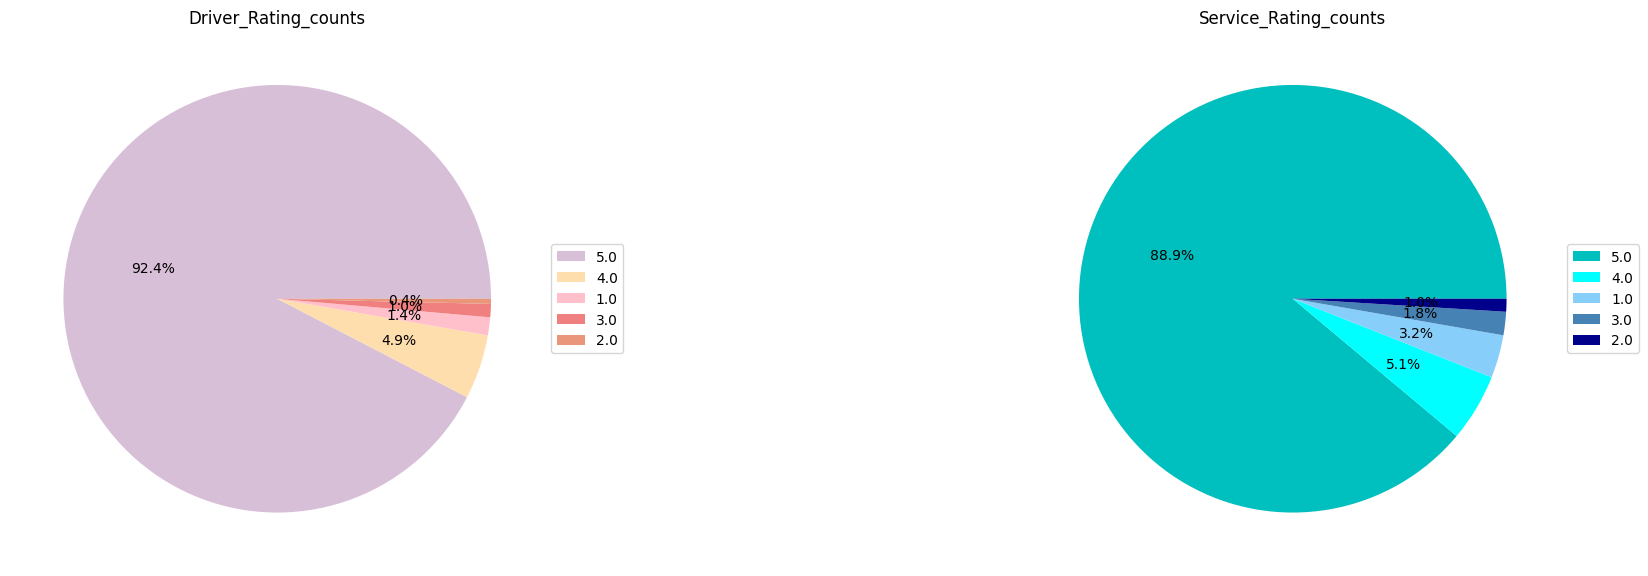

In [5]:
Driver_Rating_counts = bookings_data['rating_driver'].value_counts()
Service_Rating_counts = bookings_data['rating_service'].value_counts()
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].pie(Driver_Rating_counts, autopct='%1.1f%%', colors=['thistle', 'navajowhite','pink','lightcoral','darksalmon'])
ax[0].set_title('Driver_Rating_counts')
ax[0].legend(labels=Driver_Rating_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].pie(Service_Rating_counts, autopct='%1.1f%%', colors=['c', 'aqua','lightskyblue','steelblue','darkblue'])
ax[1].set_title('Service_Rating_counts')
ax[1].legend(labels=Service_Rating_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(wspace=0.9, hspace=0.5)
plt.show()

In [6]:
bookings_data.drop(columns=['booking_id', 'user_id','address_pickup','address_dropoff'], inplace=True)

In [7]:
bookings_data.head()

,booked_from,date_booking,number_passengers,booking_status,date_cancellation,date_joined,address_origin,address_destination,is_user_anonymized,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code
0,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,Bernoussi,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023
1,APP,2023-10-15,1,Ride Confirmed,NaN,2023-09-03,"7 Rue du Rif، Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CREDIT,NaN
2,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,H.Assalam#2,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023
3,APP,2023-10-15,1,Ride Confirmed,NaN,2023-10-11,"MJWM+M84, Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CB,NaN
4,CALL_CENTER,2023-10-13,1,Cancelled by driver,2023-10-16,2023-09-01,"334 Bd Ibn Tachfine, Casablanca 20560, Morocco",Bouskoura,False,2023-10-16,LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23,RACHID NAHHAL,NaN,NaN,25,ZERO,LACASEM1023


In [8]:
condition = bookings_data['booking_status'].str.contains('Ride Confirmed|Changed by admin|Changed by call center|Changed by client')
filtered_data = bookings_data[condition]
filtered_data.head()

,booked_from,date_booking,number_passengers,booking_status,date_cancellation,date_joined,address_origin,address_destination,is_user_anonymized,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code
0,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,Bernoussi,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023
1,APP,2023-10-15,1,Ride Confirmed,NaN,2023-09-03,"7 Rue du Rif، Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CREDIT,NaN
2,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,H.Assalam#2,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023
3,APP,2023-10-15,1,Ride Confirmed,NaN,2023-10-11,"MJWM+M84, Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CB,NaN
5,CALL_CENTER,2023-10-15,1,Ride Confirmed,NaN,2023-06-06,Mohammedia#9,CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,5.0,5.0,30,CREDIT,MOH42


In [9]:

filtered_data['rating_driver'].fillna(filtered_data['rating_driver'].mean(), inplace=True)
filtered_data['rating_service'].fillna(filtered_data['rating_service'].mean(), inplace=True)

C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\2539598775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rating_driver'].fillna(filtered_data['rating_driver'].mean(), inplace=True)
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\2539598775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rating_service'].fillna(filtered_data['rating_service'].mean(), inplace=True)


In [10]:

filtered_data.groupby('driver_name')['rating_driver'].mean().sort_values(ascending=False)


driver_name
Driver 4                 5.000000
Brahim Mourris           4.967171
YOUSSEF TOUIL            4.962597
Amine BOUTCHMAH          4.955980
Larbi YNEY               4.949506
ABDELMJID BENABBALLAH    4.946140
Ghita Benchakroun        4.928715
abdellah aboukoura       4.922286
OTHMANE AMZIL            4.917440
ACHRAF FELLAH            4.909178
younes belkbir           4.901632
Zakaria Achir            4.897992
ZOUHAIR LAHJOUJI         4.897978
ABDERRAHIM MAZRI         4.887792
abdelhalim hawasi        4.887792
MAROUANE RKAIBA          4.883538
Issam Issam              4.880311
Mohamed AKIRA            4.879192
ABDELHAK FADOUACH        4.875337
MOHSINE KAS              4.873413
HAKIM NADER              4.872936
Adnane OUARDI            4.871662
NAOUFAL NESRI            4.871586
AYOUB KHMOUCH            4.871436
Othmane JAMAE            4.870846
mohcine Ouaziz           4.870175
nasser Enouni            4.869219
BOUMHIL MOSTAPHA         4.866567
Redouane ELAZ            4.865350
Ha

C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\9459191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])


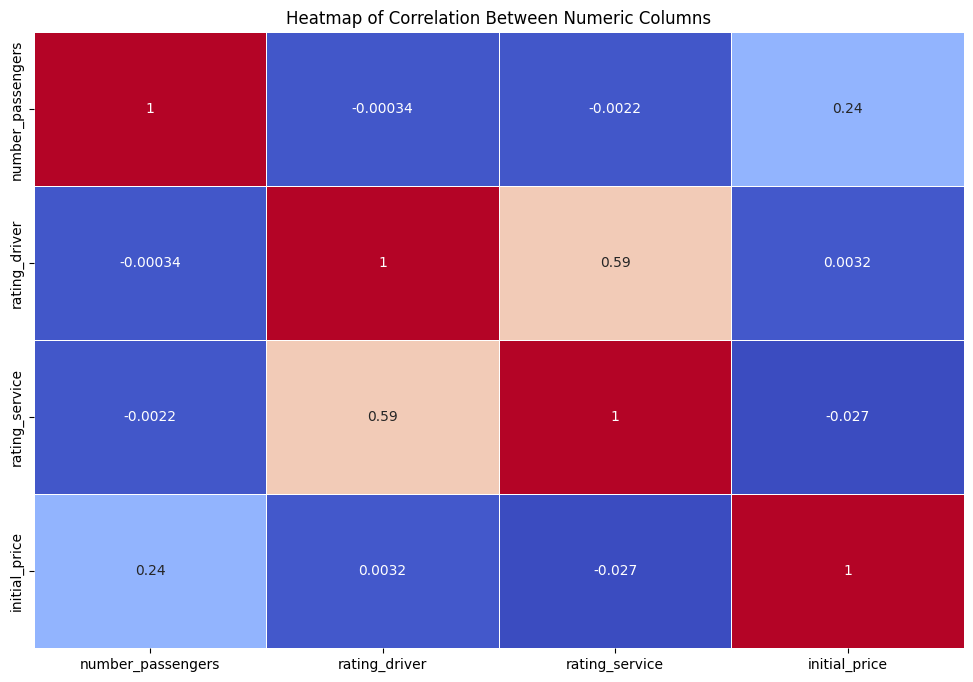

In [11]:

filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])

numeric_columns = filtered_data.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5, cbar=False)
plt.title('Heatmap of Correlation Between Numeric Columns')
plt.show()


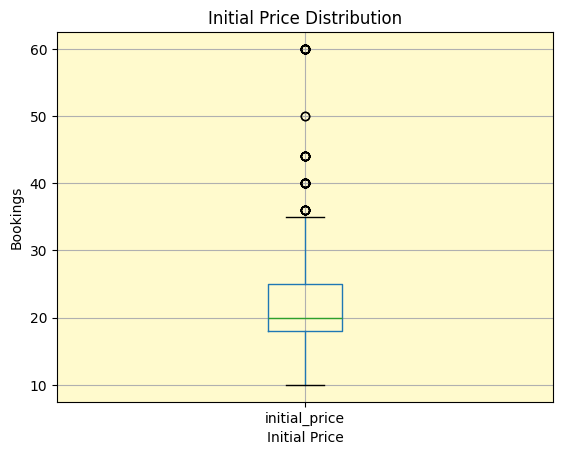

In [12]:
fig, ax = plt.subplots()
filtered_data.boxplot(column=['initial_price'], ax=ax)
ax.set_title('Initial Price Distribution')
ax.set_xlabel('Initial Price')
ax.set_ylabel('Bookings')
ax.set_facecolor('lemonchiffon')
plt.show()


C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\531285628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\531285628.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['month'] = heatmap_data['date_ride'].dt.month_name()


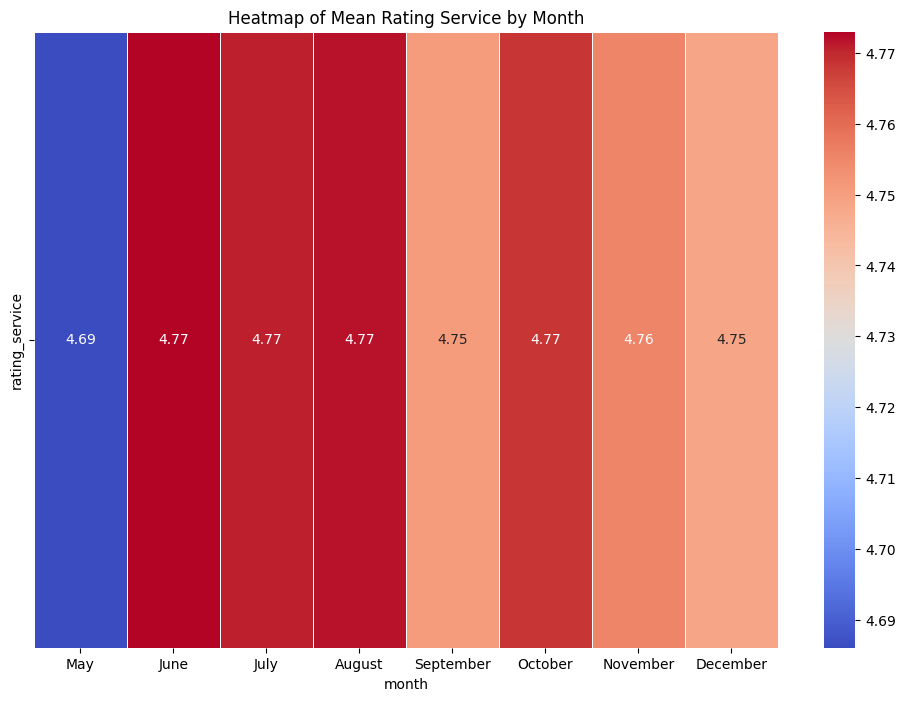

In [13]:

filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])


heatmap_data = filtered_data[['date_ride', 'rating_service']]


heatmap_data['month'] = heatmap_data['date_ride'].dt.month_name()


heatmap_data_grouped = heatmap_data.groupby('month')['rating_service'].mean().reset_index()


months_order = ['May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data_grouped['month'] = pd.Categorical(heatmap_data_grouped['month'], categories=months_order, ordered=True)


heatmap_data_grouped = heatmap_data_grouped.sort_values(by='month')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_grouped.set_index('month').T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Mean Rating Service by Month')
plt.show()


C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\1539044863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])


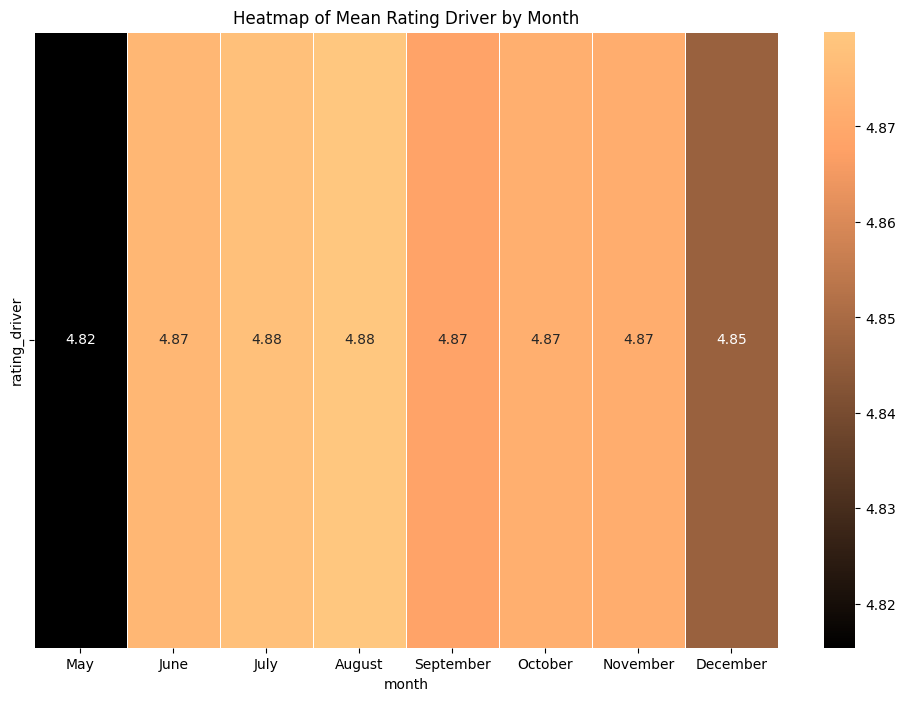

In [14]:

filtered_data['date_ride'] = pd.to_datetime(filtered_data['date_ride'])

heatmap_data = filtered_data[['date_ride', 'rating_driver']].copy()

heatmap_data['month'] = heatmap_data['date_ride'].dt.month_name()

heatmap_data_grouped = heatmap_data.groupby('month')['rating_driver'].mean().reindex([ 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_grouped.to_frame().transpose(), cmap='copper', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Mean Rating Driver by Month')
plt.show()


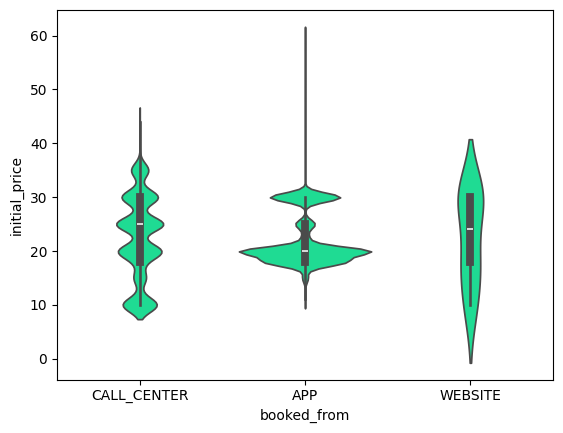

In [15]:
sns.violinplot(x="booked_from", y="initial_price", data=filtered_data, color='mediumspringgreen')
plt.show()


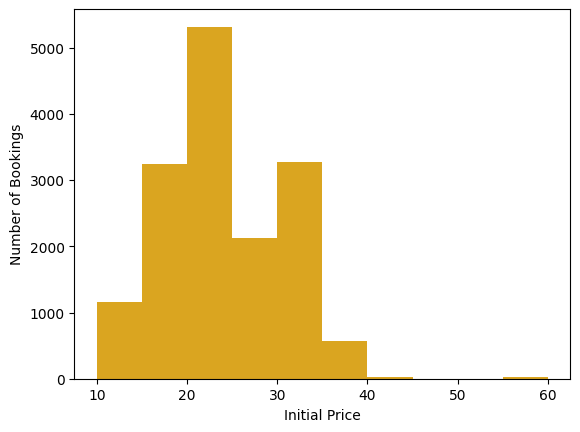

In [16]:

filtered_data['initial_price'].plot(kind='hist', color='goldenrod')
plt.xlabel('Initial Price')
plt.ylabel('Number of Bookings')
plt.show()


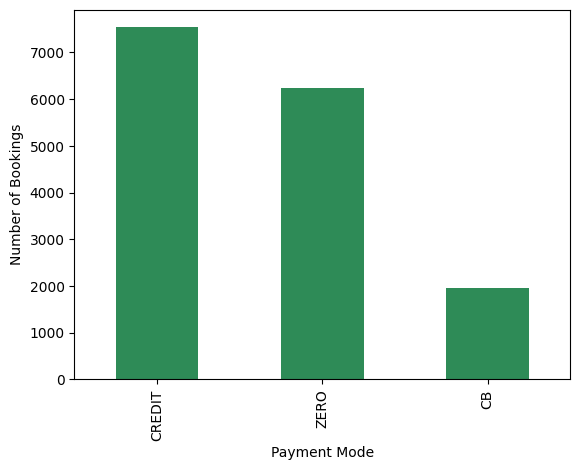

In [17]:

filtered_data['payment_mode'].value_counts().plot(kind='bar', color='seagreen')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Bookings')
plt.show()


C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\964542219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['month'] = heatmap_data['date_ride'].dt.month_name()
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\964542219.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='month', y='discount_code', data=heatmap_data_grouped, color='black', markers='o', linestyles='-', ci=None)


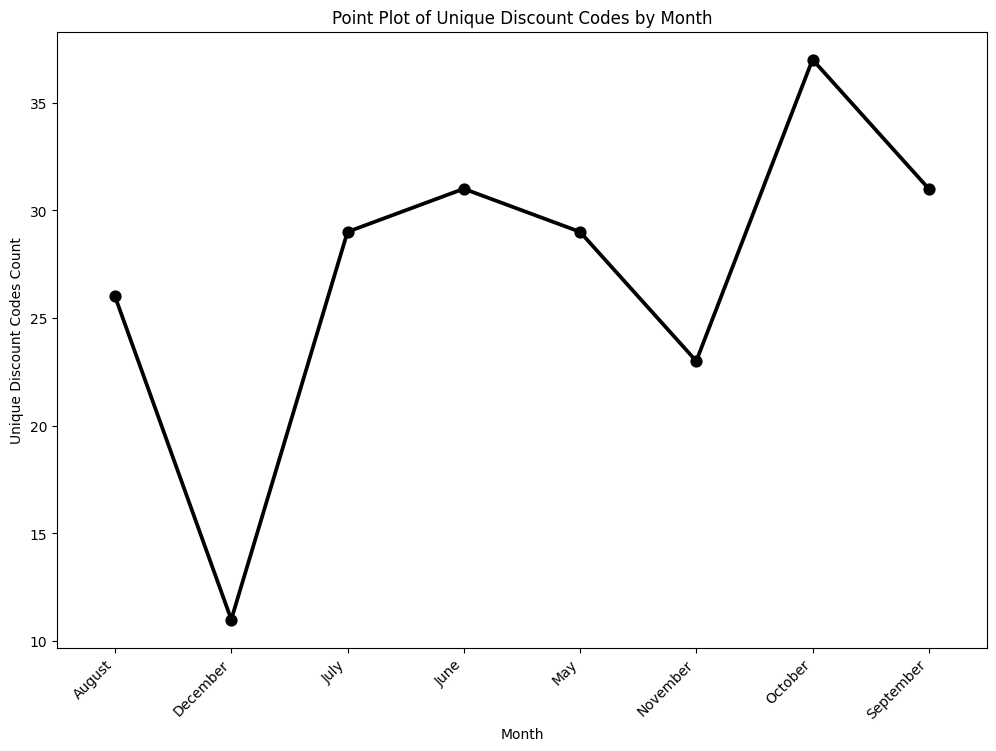

In [18]:

heatmap_data = filtered_data[['date_ride', 'discount_code']]

heatmap_data['month'] = heatmap_data['date_ride'].dt.month_name()

heatmap_data_grouped = heatmap_data.groupby(['month'])['discount_code'].nunique().reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x='month', y='discount_code', data=heatmap_data_grouped, color='black', markers='o', linestyles='-', ci=None)
plt.title('Point Plot of Unique Discount Codes by Month')
plt.xlabel('Month')
plt.ylabel('Unique Discount Codes Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


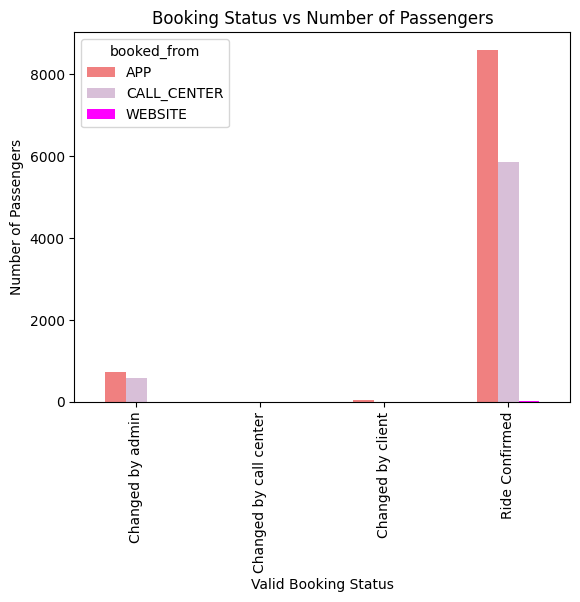

In [19]:

filtered_data.groupby(['booking_status','booked_from'])['number_passengers'].sum().unstack().plot(kind='bar', color=['lightcoral', 'thistle', 'fuchsia'])
plt.xlabel('Valid Booking Status')
plt.ylabel('Number of Passengers')
plt.title('Booking Status vs Number of Passengers')
plt.show()


In [20]:

filtered_data.isnull().sum()


booked_from                0
date_booking               0
number_passengers          0
booking_status             0
date_cancellation      15736
date_joined              280
address_origin             0
address_destination        0
is_user_anonymized         0
date_ride                  0
busline_name             142
driver_name              833
rating_driver              0
rating_service             0
initial_price              0
payment_mode               0
discount_code           5061
dtype: int64

In [21]:

condition = ~bookings_data['booking_status'].str.contains('Ride Confirmed|Changed by admin|Changed by call center|Changed by client')
Unfiltered_data = bookings_data[condition]
Unfiltered_data.head()


,booked_from,date_booking,number_passengers,booking_status,date_cancellation,date_joined,address_origin,address_destination,is_user_anonymized,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code
4,CALL_CENTER,2023-10-13,1,Cancelled by driver,2023-10-16,2023-09-01,"334 Bd Ibn Tachfine, Casablanca 20560, Morocco",Bouskoura,False,2023-10-16,LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23,RACHID NAHHAL,NaN,NaN,25,ZERO,LACASEM1023
40,APP,2023-10-15,1,Cancelled by driver,2023-10-16,2023-10-15,S.Maarouf#13,"Maarif, twin center",False,2023-10-16,LV Bousk -Abdelmomen- Marina- (Via Sidi Maarou...,Brahim Mourris,NaN,NaN,18,CB,ENAKLMAANA
52,APP,2023-10-15,1,Cancelled by client,2023-10-16,2023-08-01,"219 Bd Mohamed Zerktouni, Casablanca 20250, Mo...",CSN,False,2023-10-16,LV A.MEDINA > BSK (via Maarif - Bourgogne - Ca...,Driss EL BAHJA,NaN,NaN,20,CREDIT,NaN
61,CALL_CENTER,2023-10-13,1,Cancelled by driver,2023-10-16,2023-07-13,"346 Bd 60, Casablanca, Morocco",Bouskoura,False,2023-10-16,LV M.RACHID > BSK (via S.OTH-SBATA-A.CHOCK-CN)...,AYOUB KHMOUCH,NaN,NaN,25,ZERO,BOSCH1023
62,CALL_CENTER,2023-10-13,1,Cancelled by call center,2023-10-13,2023-10-12,"bouskoura, diar al andalous",Bouskoura,False,2023-10-16,LV M.RACHID > BSK (via S.OTH-SBATA-A.CHOCK-CN)...,AYOUB KHMOUCH,NaN,NaN,10,ZERO,NaN


In [22]:
Unfiltered_data['rating_driver'].fillna(0, inplace=True)
Unfiltered_data['rating_service'].fillna(0, inplace=True)
Unfiltered_data.isnull().sum()

C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\392202809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unfiltered_data['rating_driver'].fillna(0, inplace=True)
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\392202809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unfiltered_data['rating_service'].fillna(0, inplace=True)


booked_from               0
date_booking              0
number_passengers         0
booking_status            0
date_cancellation         0
date_joined              29
address_origin            0
address_destination       0
is_user_anonymized        0
date_ride                 0
busline_name             19
driver_name             203
rating_driver             0
rating_service            0
initial_price             0
payment_mode              0
discount_code          1619
dtype: int64

C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\2944802612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unfiltered_data['date_booking'] = pd.to_datetime(Unfiltered_data['date_booking'])
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\2944802612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unfiltered_data['date_cancellation'] = pd.to_datetime(Unfiltered_data['date_cancellation'])
C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\2944802612.py:4: SettingWithCopyWarning: 
A value is trying to

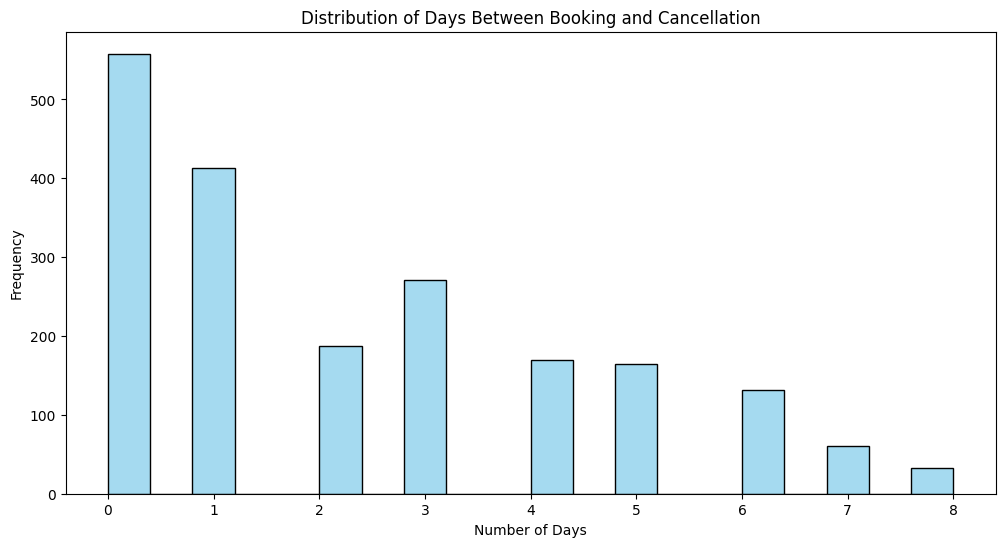

In [23]:

Unfiltered_data['date_booking'] = pd.to_datetime(Unfiltered_data['date_booking'])
Unfiltered_data['date_cancellation'] = pd.to_datetime(Unfiltered_data['date_cancellation'])

Unfiltered_data['days_between'] = (Unfiltered_data['date_cancellation'] - Unfiltered_data['date_booking']).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(Unfiltered_data['days_between'].dropna(), bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Booking and Cancellation')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()


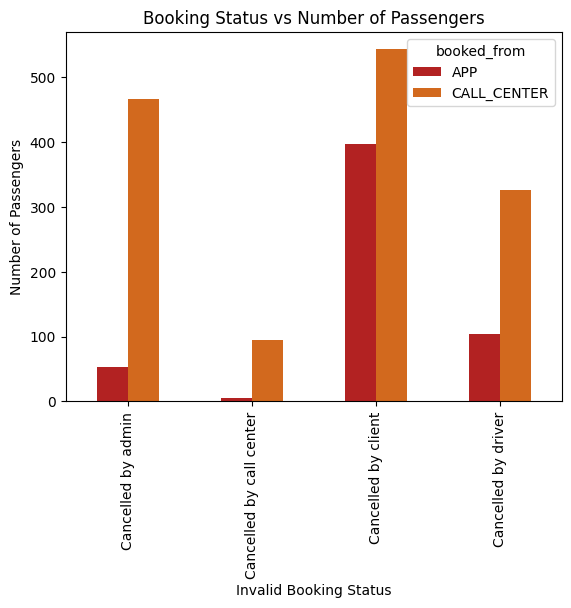

In [24]:

Unfiltered_data.groupby(['booking_status','booked_from'])['number_passengers'].sum().unstack().plot(kind='bar', color=['firebrick','chocolate'])
plt.xlabel('Invalid Booking Status')
plt.ylabel('Number of Passengers')
plt.title('Booking Status vs Number of Passengers')
plt.show()


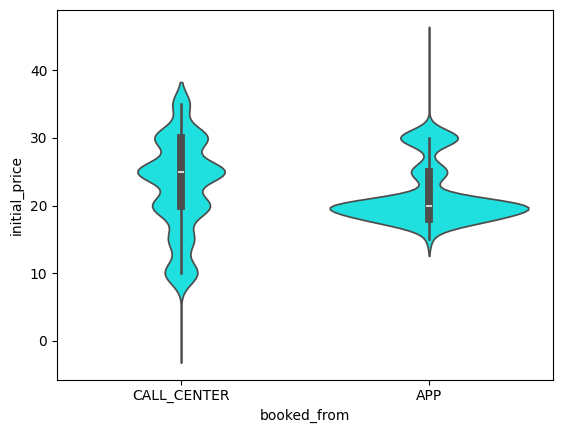

In [25]:
sns.violinplot(x="booked_from", y="initial_price", data=Unfiltered_data, color='aqua')
plt.show()

In [26]:
filtered_data.head()

,booked_from,date_booking,number_passengers,booking_status,date_cancellation,date_joined,address_origin,address_destination,is_user_anonymized,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code
0,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,Bernoussi,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,4.86535,4.754538,30,ZERO,SEW1023
1,APP,2023-10-15,1,Ride Confirmed,NaN,2023-09-03,"7 Rue du Rif، Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,4.86535,4.754538,30,CREDIT,NaN
2,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaN,2023-03-31,H.Assalam#2,Bouskoura 27182,False,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,4.86535,4.754538,30,ZERO,SEW1023
3,APP,2023-10-15,1,Ride Confirmed,NaN,2023-10-11,"MJWM+M84, Mohammédia, Maroc",CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,4.86535,4.754538,30,CB,NaN
5,CALL_CENTER,2023-10-15,1,Ride Confirmed,NaN,2023-06-06,Mohammedia#9,CSN,False,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,5.00000,5.000000,30,CREDIT,MOH42


In [27]:

server = 'DESKTOP-UC2CEKI'
database = 'bookings_data'

connection_string = f'DRIVER=SQL Server;SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)
print("Connection successful")

create_and_populate_query = """
-- Creating a temporary table with busline names and their launch dates
IF OBJECT_ID('tempdb..#BuslineLaunchDates') IS NOT NULL DROP TABLE #BuslineLaunchDates;

CREATE TABLE #BuslineLaunchDates (
    busline_name NVARCHAR(255),
    launch_date DATE
);

-- Populating the temporary table
INSERT INTO #BuslineLaunchDates (busline_name, launch_date)
SELECT DISTINCT
    busline_name,
    TRY_CAST('01-' + RIGHT(busline_name, 5) AS DATE) AS launch_date
FROM
    bookings_data
WHERE
    LEN(busline_name) >= 5;
"""

cursor = conn.cursor()
cursor.execute(create_and_populate_query)

select_query = "SELECT * FROM #BuslineLaunchDates;"
df_temp_table = pd.read_sql(select_query, conn)

print(df_temp_table)



Connection successful
                                         busline_name launch_date
0   LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...  2023-01-05
1                       LF BSK > CN > MOHAMEDIA 05-23  2023-01-05
2        LF CN > DARB  (via Errahma > Lissasfa) 05-23  2023-01-05
3         LF DARB > CN (via Errahma > Lissasfa) 05-23  2023-01-05
4   LV  CN > M.RACHID > (via S.OTH-SBATA-A.CHOCK) ...  2023-01-06
..                                                ...         ...
79                       ZZZRAB BERN - CN (via A.SEB)        None
80                         ZZZRAB CN > HH OULFA 05-23  2023-01-05
81                        ZZZRAB MOH > CN (graphiqué)        None
82  ZZZTEST - FREE - MOHAMMEDIA (retour) > Zenith ...        None
83    ZZZTEST - LV - (aller) HH > OULFA  > CN > Bousk        None

[84 rows x 2 columns]


C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\1441239161.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp_table = pd.read_sql(select_query, conn)


C:\Users\emtin\AppData\Local\Temp\ipykernel_18472\3887788056.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_grouped_dates = pd.read_sql(group_dates_query, conn)


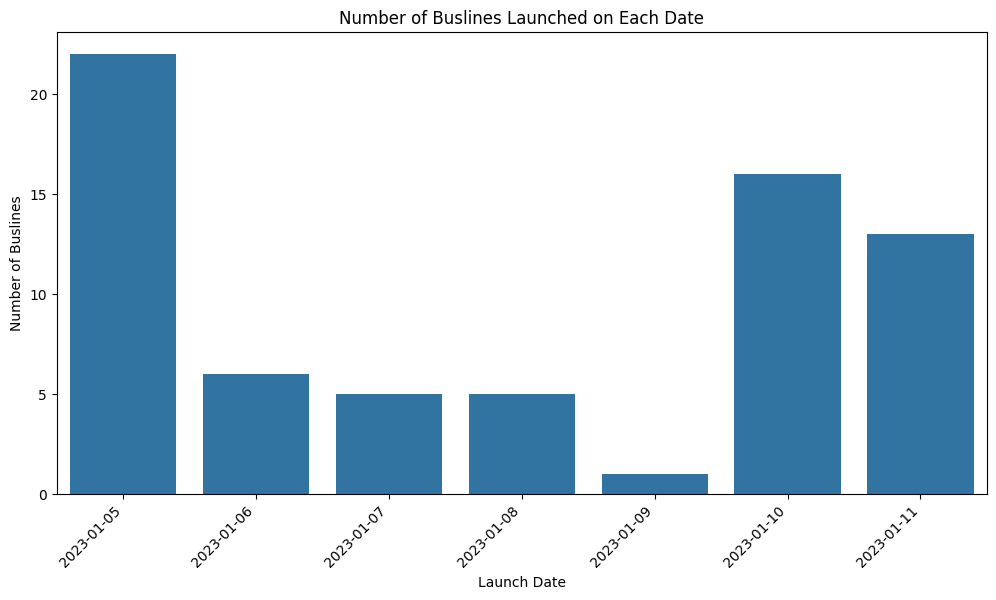

In [28]:

group_dates_query = """
SELECT launch_date, COUNT(*) as num_buslines
FROM #BuslineLaunchDates
GROUP BY launch_date
ORDER BY launch_date;
"""


df_grouped_dates = pd.read_sql(group_dates_query, conn)


plt.figure(figsize=(12, 6))
sns.barplot(x='launch_date', y='num_buslines', data=df_grouped_dates)
plt.title('Number of Buslines Launched on Each Date')
plt.xlabel('Launch Date')
plt.ylabel('Number of Buslines')
plt.xticks(rotation=45, ha='right')
plt.show()
cursor.close()
conn.close()

In [29]:
'''It was an absolute pleasure working on this project! Analyzing real-time projects with SQL Server has been insightful.
I've become adept at organizing data efficiently and optimizing SQL queries for better performance. 
Handling temporal aspects, I've used SQL Server's date functions to uncover trends over time.
Integrating SQL Server with visualization tools has allowed me to create impactful reports.
Moving forward, exploring advanced SQL Server features could enhance my analysis capabilities for future projects.'''

"It was an absolute pleasure working on this project! Analyzing real-time projects with SQL Server has been insightful.\nI've become adept at organizing data efficiently and optimizing SQL queries for better performance. \nHandling temporal aspects, I've used SQL Server's date functions to uncover trends over time.\nIntegrating SQL Server with visualization tools has allowed me to create impactful reports.\nMoving forward, exploring advanced SQL Server features could enhance my analysis capabilities for future projects."